# Explainer plots for understanding autocorrelation and autocorrelation time

Autocorrelation Time Summary                     Series  Estimated τ_int
0  High-AC time (phi=0.95)            41.42
1   Low-AC time (phi=0.10)             1.21


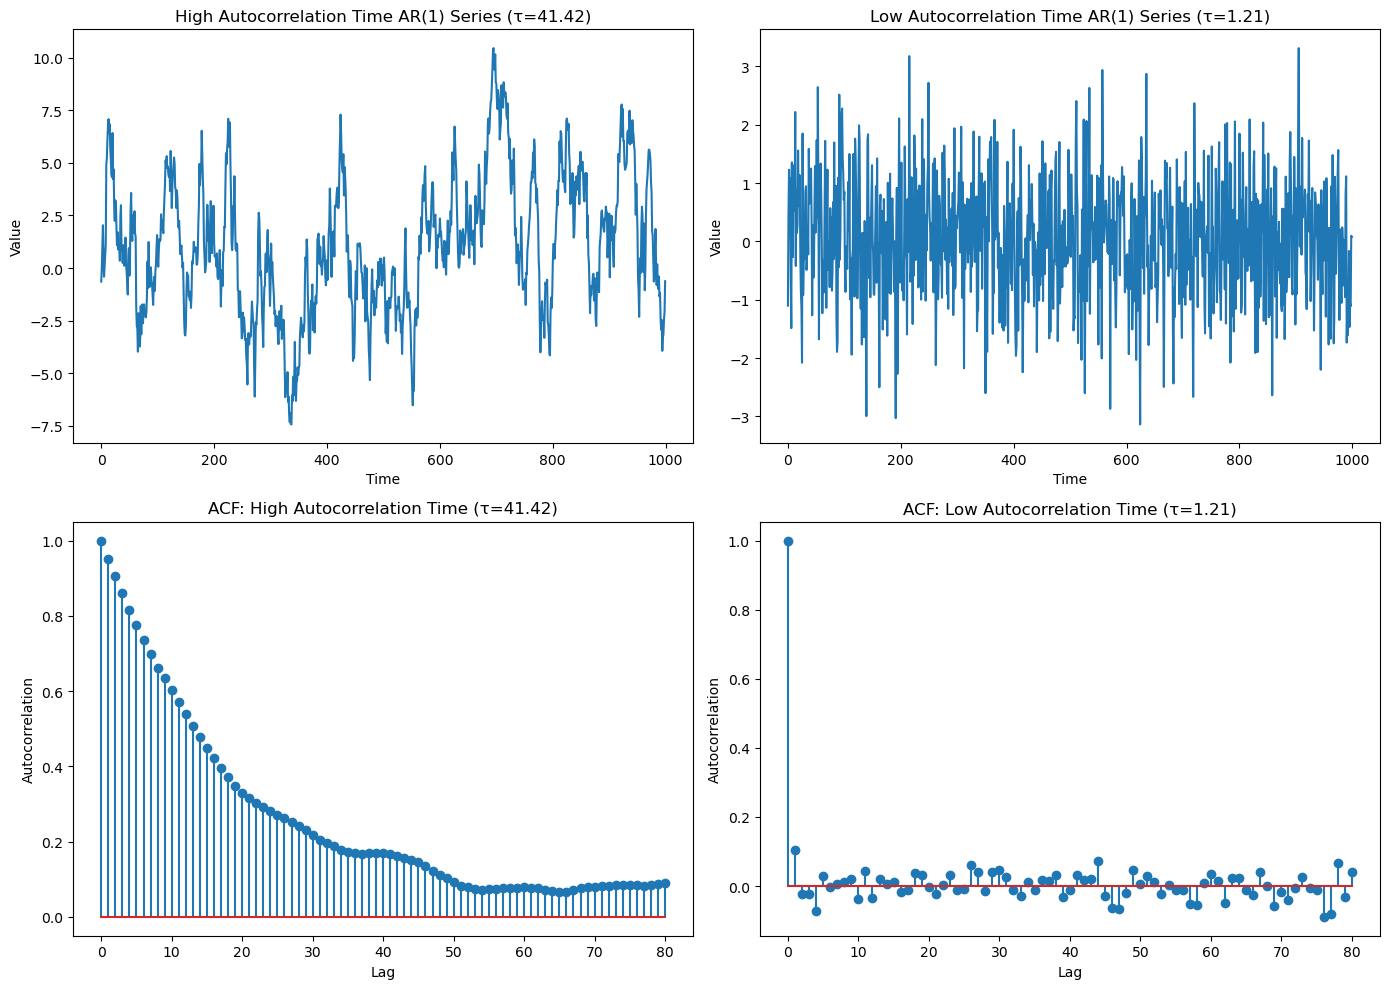

In [30]:
# Create and visualize two time series with different autocorrelation times
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

np.random.seed(42)

def ar1(phi, n=700, burn_in=200, sigma=1.0):
    x = np.zeros(n)
    eps = np.random.normal(0, sigma, n)
    for t in range(1, n):
        x[t] = phi * x[t-1] + eps[t]
    return x[burn_in:]  # drop burn-in

def acf(x, max_lag=100):
    x = np.asarray(x)
    x = x - x.mean()
    n = len(x)
    var = np.dot(x, x) / n
    acf_vals = np.empty(max_lag+1)
    acf_vals[0] = 1.0
    for k in range(1, max_lag+1):
        acf_vals[k] = np.dot(x[:n-k], x[k:]) / (n * var)
    return acf_vals

def integrated_autocorr_time(acf_vals):
    # Sokal-style: 1 + 2 * sum until first non-positive
    tail = acf_vals[1:]
    cutoff = len(tail)
    for i, r in enumerate(tail):
        if r <= 0:
            cutoff = i
            break
    return 1 + 2 * np.sum(tail[:cutoff])

# Generate series
x_high = ar1(phi=0.95, n=1200, burn_in=200, sigma=1.0)
x_low  = ar1(phi=0.10, n=1200, burn_in=200, sigma=1.0)

# Compute ACFs and IATs
max_lag = 80
acf_high = acf(x_high, max_lag=max_lag)
acf_low  = acf(x_low,  max_lag=max_lag)

tau_high = integrated_autocorr_time(acf_high)
tau_low  = integrated_autocorr_time(acf_low)

# Assemble a summary table
summary = pd.DataFrame({
    "Series": ["High-AC time (phi=0.95)", "Low-AC time (phi=0.10)"],
    "Estimated τ_int": [tau_high, tau_low]
})

# from caas_jupyter_tools import display_dataframe_to_user
print("Autocorrelation Time Summary", summary.round(2))
# Plot: combined 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time series plots
axes[0, 0].plot(x_high)
axes[0, 0].set_title(f"High Autocorrelation Time AR(1) Series (τ={tau_high:.2f})")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Value")

axes[0, 1].plot(x_low)
axes[0, 1].set_title(f"Low Autocorrelation Time AR(1) Series (τ={tau_low:.2f})")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Value")

# ACF plots
lags = np.arange(0, max_lag+1)

axes[1, 0].stem(lags, acf_high)
axes[1, 0].set_title(f"ACF: High Autocorrelation Time (τ={tau_high:.2f})")
axes[1, 0].set_xlabel("Lag")
axes[1, 0].set_ylabel("Autocorrelation")

axes[1, 1].stem(lags, acf_low)
axes[1, 1].set_title(f"ACF: Low Autocorrelation Time (τ={tau_low:.2f})")
axes[1, 1].set_xlabel("Lag")
axes[1, 1].set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()

# Save the data to CSVs for download
df = pd.DataFrame({
    "t": np.arange(len(x_high)),
    "x_high_phi_0_95": x_high[:len(x_high)],
    "x_low_phi_0_10": x_low[:len(x_low)]
})


Autocorrelation Time Summary
          Series  Estimated τ_int  Theoretical τ_int (AR1)
0  High-AC time            41.42                    39.00
1   Low-AC time             1.21                     1.22


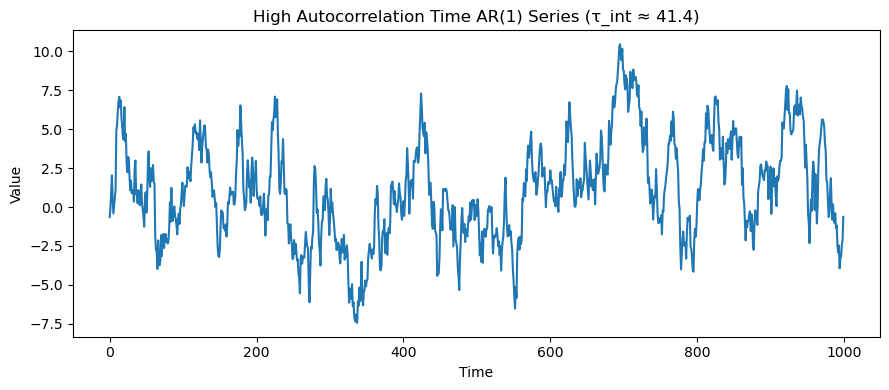

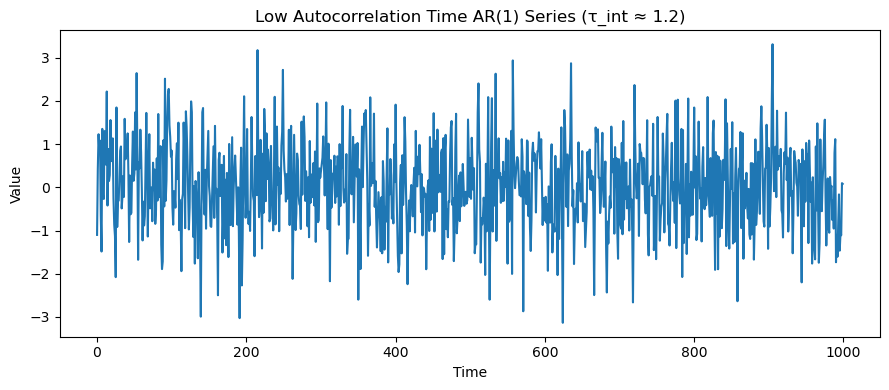

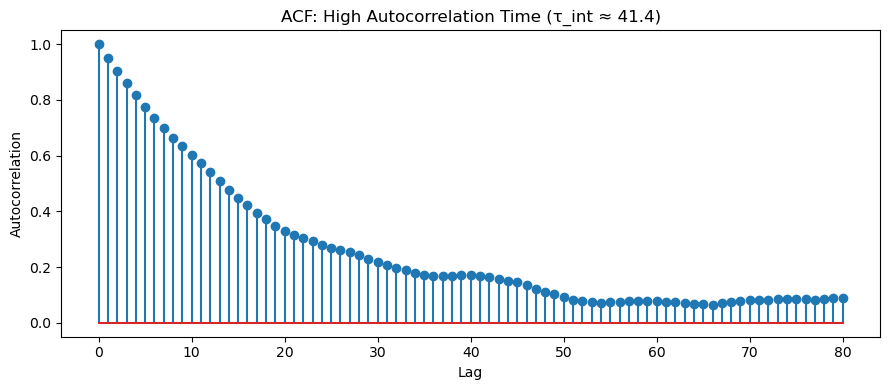

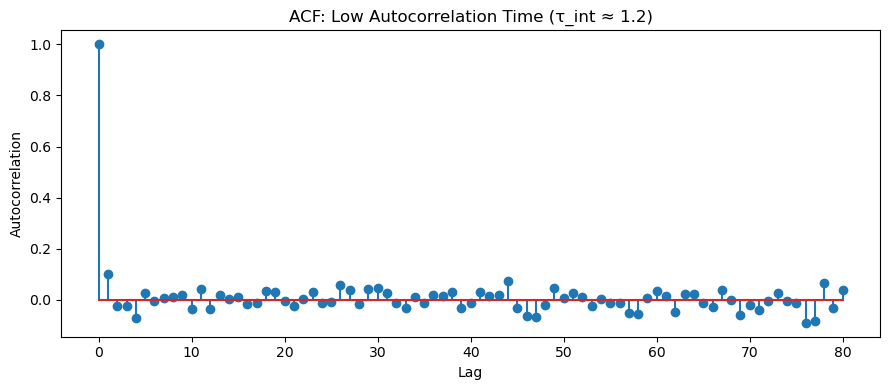

In [2]:
# Create and visualize two time series with different autocorrelation times
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

def ar1(phi, n=700, burn_in=200, sigma=1.0):
    x = np.zeros(n)
    eps = np.random.normal(0, sigma, n)
    for t in range(1, n):
        x[t] = phi * x[t-1] + eps[t]
    return x[burn_in:]  # drop burn-in

def acf(x, max_lag=100):
    x = np.asarray(x)
    x = x - x.mean()
    n = len(x)
    var = np.dot(x, x) / n
    acf_vals = np.empty(max_lag+1)
    acf_vals[0] = 1.0
    for k in range(1, max_lag+1):
        acf_vals[k] = np.dot(x[:n-k], x[k:]) / (n * var)
    return acf_vals

def integrated_autocorr_time(acf_vals):
    # Sokal-style: 1 + 2 * sum until first non-positive
    tail = acf_vals[1:]
    cutoff = len(tail)
    for i, r in enumerate(tail):
        if r <= 0:
            cutoff = i
            break
    return 1 + 2 * np.sum(tail[:cutoff])

# Generate series
phi_high, phi_low = 0.95, 0.10
x_high = ar1(phi=phi_high, n=1200, burn_in=200, sigma=1.0)
x_low  = ar1(phi=phi_low,  n=1200, burn_in=200, sigma=1.0)

# Compute ACFs and IATs
max_lag = 80
acf_high = acf(x_high, max_lag=max_lag)
acf_low  = acf(x_low,  max_lag=max_lag)

tau_high = integrated_autocorr_time(acf_high)
tau_low  = integrated_autocorr_time(acf_low)

# Optional: theoretical τ for AR(1): (1+phi)/(1-phi)
tau_high_theory = (1 + phi_high) / (1 - phi_high)
tau_low_theory  = (1 + phi_low)  / (1 - phi_low)

# Assemble a summary table
summary = pd.DataFrame({
    "Series": ["High-AC time", "Low-AC time"],
    "Estimated τ_int": [tau_high, tau_low],
    "Theoretical τ_int (AR1)": [tau_high_theory, tau_low_theory]
})
print("Autocorrelation Time Summary\n", summary.round(2))

# Plot: time series (two separate figures)
plt.figure(figsize=(9, 4))
plt.plot(x_high)
plt.title(f"High Autocorrelation Time AR(1) Series (τ_int ≈ {tau_high:.1f})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 4))
plt.plot(x_low)
plt.title(f"Low Autocorrelation Time AR(1) Series (τ_int ≈ {tau_low:.1f})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Plot: ACFs (two separate figures)
lags = np.arange(0, max_lag+1)

plt.figure(figsize=(9, 4))
plt.stem(lags, acf_high)
plt.title(f"ACF: High Autocorrelation Time (τ_int ≈ {tau_high:.1f})")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 4))
plt.stem(lags, acf_low)
plt.title(f"ACF: Low Autocorrelation Time (τ_int ≈ {tau_low:.1f})")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

# Save the data to CSVs for download
df = pd.DataFrame({
    "t": np.arange(len(x_high)),
    "x_high": x_high[:len(x_high)],
    "x_low": x_low[:len(x_low)]
})
# Example: df.to_csv("two_ar1_series.csv", index=False)


In [44]:
# simulate some data using telegraph model and plot autocorrelation 
import numpy as np
import pandas as pd
from simulation.simulate_telegraph_model import simulate_one_telegraph_model_system, simulate_two_telegraph_model_systems
from simulation.mean_cv_t_ac import find_tilda_parameters
from utils.steady_state import save_steady_state
from stats.autocorrelation import autocrosscorr
from scipy.interpolate import interp1d

In [49]:
cv_target = 1.0
mu_target = 1000
t_ac_target_low = 3.9872084972448647
t_ac_target_high = 35.62444724980742

results = {}
for condition in ["normal", "stress"]:
    if condition == "normal":
        t_ac_target_for_condition = t_ac_target_high
    else:
        t_ac_target_for_condition = t_ac_target_low
    # Solve for parameters using the tilda formulation
    rho, d, sigma_b, sigma_u = find_tilda_parameters(
        mu_target=mu_target,
        t_ac_target=t_ac_target_for_condition,
        cv_target=cv_target,
    )
    results[condition] = {
        "rho": rho,
        "d": d,
        "sigma_b": sigma_b,
        "sigma_u": sigma_u,
    }

# update parameter sets
parameter_sets = [
    {
        "sigma_u": results["stress"]["sigma_u"],
        "sigma_b": results["stress"]["sigma_b"],
        "rho": results["stress"]["rho"],
        "d": results["stress"]["d"],
        "label": 0,
    },
    {
        "sigma_u": results["normal"]["sigma_u"],
        "sigma_b": results["normal"]["sigma_b"],
        "rho": results["normal"]["rho"],
        "d": results["normal"]["d"],
        "label": 1,
    },
]

In [50]:
# Output the results
print("Updated Parameter Sets:", parameter_sets)

# Simulation parameters
min_d = min(pset["d"] for pset in parameter_sets)
steady_state_time = int(10 / min_d)
time_points = np.arange(0, 144, 1)
extended_time_points = np.arange(
    time_points[0],
    144 + steady_state_time,
    1,
)
size = 200
num_iterations = 10
# df_results = simulate_two_telegraph_model_systems(
#     parameter_sets, extended_time_points, size
# )

Updated Parameter Sets: [{'sigma_u': 0.792857698248734, 'sigma_b': 0.20714230175126608, 'rho': 1705.0035351897122, 'd': 0.3531783567732428, 'label': 0}, {'sigma_u': 0.972658999055055, 'sigma_b': 0.02734100094494503, 'rho': 1056.7566778711773, 'd': 0.02889278532825283, 'label': 1}]


In [76]:
# read straight from previously simulated time series
df_results_low = pd.read_csv("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY010/data_7_mu_cv_fixed/mRNA_trajectories_1000.000_1.000_3.987.csv")
df_results_high = pd.read_csv("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY010/data_7_mu_cv_fixed/mRNA_trajectories_1000.000_1.000_35.624.csv")
# label each df
df_results_low['label'] = 0
df_results_high['label'] = 1

# get the final 185 cols of high
df_results_high = df_results_high.iloc[:, -185:]

df_results = [df_results_low, df_results_high]
from utils.standardise_time_series import standardise_time_series
df_results = standardise_time_series(df_results, labels=[df['label'] for df in df_results], prefix="t_")

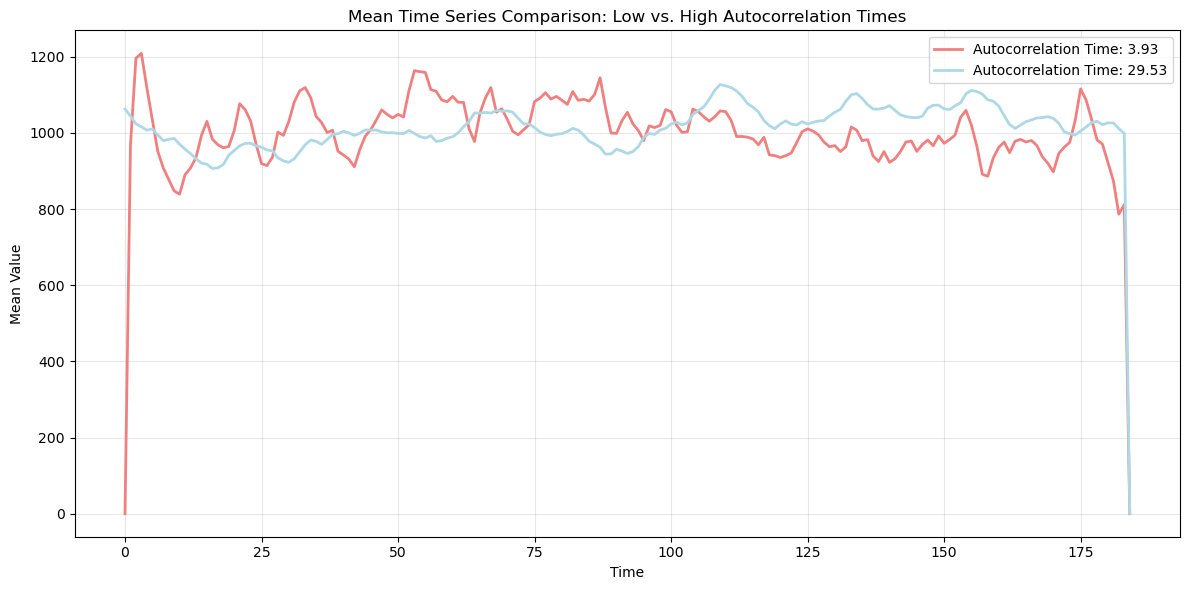

In [81]:
# plot the mean of the time series for each condition
# Calculate means for each condition
stress_data = df_results[df_results['label'] == 0].iloc[:, :-1]  # exclude label column
normal_data = df_results[df_results['label'] == 1].iloc[:, :-1]  # exclude label column

stress_mean = stress_data.mean(axis=0)
normal_mean = normal_data.mean(axis=0)

# Create numeric time points for x-axis
time_points = np.arange(len(stress_mean))

# Plot both time series overlapped in one plot
plt.figure(figsize=(12, 6))

plt.plot(time_points, stress_mean.values, color='lightcoral', linewidth=2, label=f'Autocorrelation Time: {ac_time_stress:.2f}')
plt.plot(time_points, normal_mean.values, color='lightblue', linewidth=2, label=f'Autocorrelation Time: {ac_time_normal:.2f}')

plt.title('Mean Time Series Comparison: Low vs. High Autocorrelation Times')
plt.xlabel('Time')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


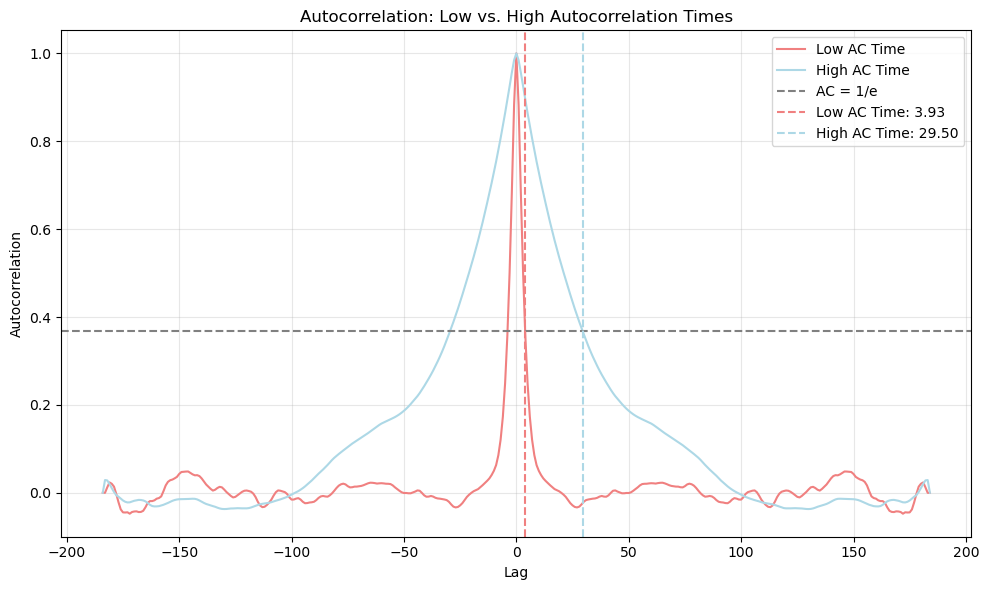

In [83]:
from stats.autocorrelation import calculate_autocorrelation, calculate_ac_time_interp1d
# Calculate autocorrelation for the sample dataset
df_ac = calculate_autocorrelation(df_results)
# Plot the autocorrelation for the sample
plt.figure(figsize=(10, 6))

# Calculate the mean autocorrelation ACROSS ALL TIME SERIES
mean_stress_ac = np.nanmean(df_ac['stress_ac'], axis=0)
mean_normal_ac = np.nanmean(df_ac['normal_ac'], axis=0)
ac_time_stress = calculate_ac_time_interp1d(mean_stress_ac,df_ac['stress_lags'])
ac_time_normal = calculate_ac_time_interp1d(mean_normal_ac,df_ac['normal_lags'])

# Plot stress and normal conditions
plt.plot(df_ac['stress_lags'], mean_stress_ac, color = 'lightcoral', label=f'Low AC Time')
plt.plot(df_ac['normal_lags'], mean_normal_ac, color = 'lightblue', label=f'High AC Time')

# plot the AC time lines, show the values 
plt.axhline(y=1/np.e, color='gray', linestyle='--', label='AC = 1/e')
plt.axvline(x=ac_time_stress, color='lightcoral', linestyle='--', label=f'Low AC Time: {ac_time_stress:.2f}')
plt.axvline(x=ac_time_normal, color='lightblue', linestyle='--', label=f'High AC Time: {ac_time_normal:.2f}')
# Annotate the AC time values on the plot
# plt.annotate(f"{ac_time_stress:.3f}", xy=(ac_time_stress, 1/np.e), xytext=(ac_time_stress+1, 1/np.e+0.05),
            #  arrowprops=dict(arrowstyle="->", color='red'), color='red', fontsize=10)
# plt.annotate(f"{ac_time_normal:.3f}", xy=(ac_time_normal, 1/np.e), xytext=(ac_time_normal+1, 1/np.e-0.05),
            #  arrowprops=dict(arrowstyle="->", color='blue'), color='blue', fontsize=10)

plt.title('Autocorrelation: Low vs. High Autocorrelation Times')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()